<a href="https://colab.research.google.com/github/Jothsna1234/Product-Length-Prediction/blob/main/PRODUCT_LENGTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
-import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/product_train.csv")

In [ ]:
train

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
1048570,1705767,VSASA’s Sleek Light Elegant Exclusive Gold Pla...,"[STYLISH MANGALSUTRA,AMERICAN DIAMOD MANGALSUT...",PRODUCT DESCRIPTION-PRECIOUS QUEENLY RANGE OF ...,11642,1800.000000
1048571,2771042,Generic Lovers Famous Place Eiffel Tower in Pa...,"[Generic are ""Made in India' products using su...",This Case is Made up of Hard Polycarbonate Pla...,12064,787.401574
1048572,9322,Advances in Geophysics: v. 34,NaN,NaN,6315,625.000000
1048573,562083,Facts Plus,NaN,Used Book in good condition. May have some mar...,1,1106.000000


In [ ]:
train.shape

(1048575, 6)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   PRODUCT_ID       1048575 non-null  int64  
 1   TITLE            1048570 non-null  object 
 2   BULLET_POINTS    658447 non-null   object 
 3   DESCRIPTION      509050 non-null   object 
 4   PRODUCT_TYPE_ID  1048575 non-null  int64  
 5   PRODUCT_LENGTH   1048575 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 48.0+ MB


In [ ]:
train.isnull().sum()

PRODUCT_ID              0
TITLE                   5
BULLET_POINTS      390128
DESCRIPTION        539525
PRODUCT_TYPE_ID         0
PRODUCT_LENGTH          0
dtype: int64

In [ ]:
train.drop(['BULLET_POINTS','DESCRIPTION','TITLE'],axis=1,inplace=True)

In [ ]:
train

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,1650,2125.980000
1,2673191,2755,393.700000
2,2765088,7537,748.031495
3,1594019,2996,787.401574
4,283658,6112,598.424000
...,...,...,...
1048570,1705767,11642,1800.000000
1048571,2771042,12064,787.401574
1048572,9322,6315,625.000000
1048573,562083,1,1106.000000


In [ ]:
train.isnull().sum()

PRODUCT_ID         0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64

In [ ]:
train.duplicated().any()

False

In [ ]:
train.skew()

PRODUCT_ID           0.000886
PRODUCT_TYPE_ID      0.865970
PRODUCT_LENGTH     972.326279
dtype: float64

In [ ]:
q1=train['PRODUCT_LENGTH'].quantile(0.25)
q2=train['PRODUCT_LENGTH'].quantile(0.75)
q1

511.8110231

In [ ]:
q2

1062.992125

In [ ]:
train['PRODUCT_LENGTH']=np.where(train['PRODUCT_LENGTH']<q1,q1,train['PRODUCT_LENGTH'])
train['PRODUCT_LENGTH']=np.where(train['PRODUCT_LENGTH']>q2,q2,train['PRODUCT_LENGTH'])
train.skew()

PRODUCT_ID         0.000886
PRODUCT_TYPE_ID    0.865970
PRODUCT_LENGTH     0.380764
dtype: float64

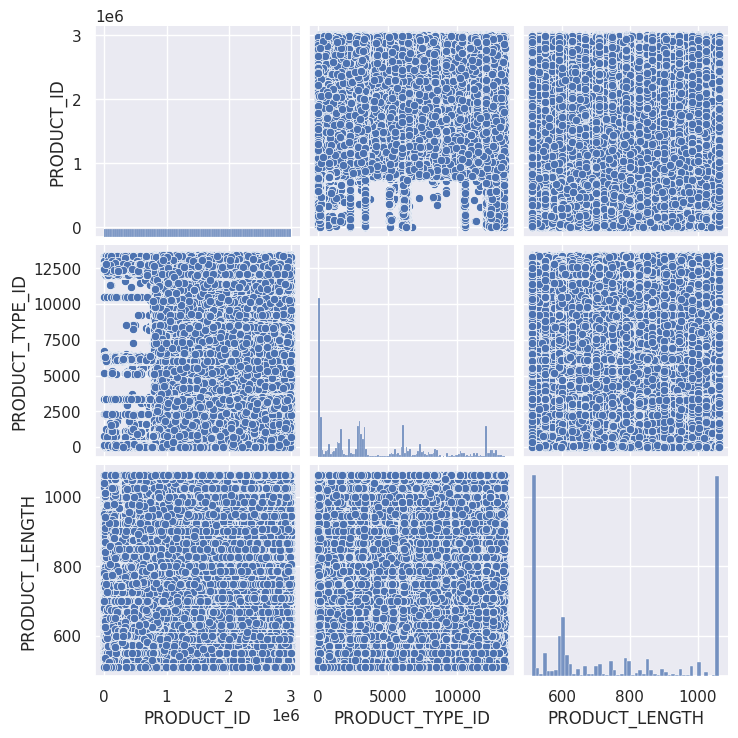

In [ ]:
sns.pairplot(train)

In [ ]:
train.corr()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
PRODUCT_ID,1.000000,0.250494,0.176536
PRODUCT_TYPE_ID,0.250494,1.000000,0.041309
PRODUCT_LENGTH,0.176536,0.041309,1.000000


In [ ]:
train.columns

Index(['PRODUCT_ID', 'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'], dtype='object')

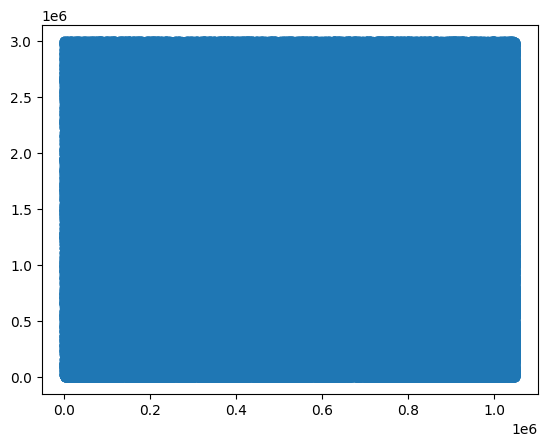

In [ ]:
plt.scatter(train.index,train['PRODUCT_ID'])
plt.show()

<Axes: ylabel='PRODUCT_ID'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


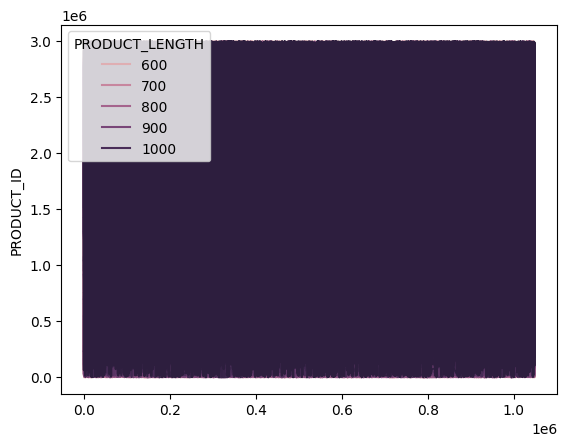

In [ ]:
sns.lineplot(x=train.index,y=train['PRODUCT_ID'],hue=train['PRODUCT_LENGTH'])

<ipython-input-23-33c8ca5c5840>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['PRODUCT_TYPE_ID'],shade=True)


<Axes: xlabel='PRODUCT_TYPE_ID', ylabel='Density'>

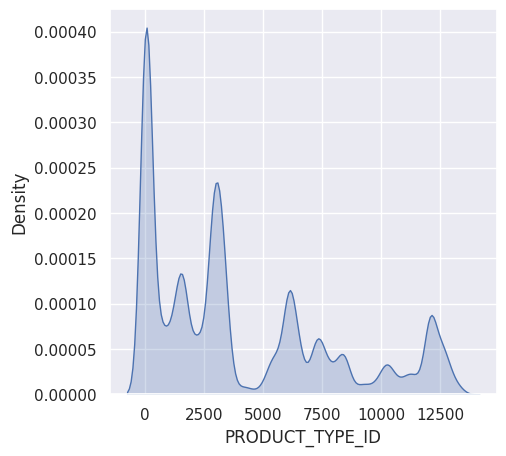

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(train['PRODUCT_TYPE_ID'],shade=True)

In [ ]:
train.dtypes

PRODUCT_ID           int64
PRODUCT_TYPE_ID      int64
PRODUCT_LENGTH     float64
dtype: object

In [ ]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#train['TITLE']= label_encoder.fit_transform(train['TITLE'])

In [ ]:
#train['TITLE']

In [ ]:
y=train.PRODUCT_LENGTH


In [ ]:
y

0          1062.992125
1           511.811023
2           748.031495
3           787.401574
4           598.424000
              ...     
1048570    1062.992125
1048571     787.401574
1048572     625.000000
1048573    1062.992125
1048574     598.424000
Name: PRODUCT_LENGTH, Length: 1048575, dtype: float64

In [ ]:
x=train.drop(['PRODUCT_LENGTH'],axis=1)


In [ ]:
x

,PRODUCT_ID,PRODUCT_TYPE_ID
0,1925202,1650
1,2673191,2755
2,2765088,7537
3,1594019,2996
4,283658,6112
...,...,...
1048570,1705767,11642
1048571,2771042,12064
1048572,9322,6315
1048573,562083,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)


In [ ]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(x,y,train_size=0.9,test_size=100)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([706.40155266, 712.95382331, 711.32693464, ..., 708.11214739,
       707.06322268, 705.84382123])

In [ ]:
data=pd.DataFrame(y_pred,columns=['PRODUCT_LENGTH'])

In [ ]:
data

,PRODUCT_LENGTH
0,706.401553
1,712.953823
2,711.326935
3,706.335455
4,713.186872
...,...
943712,706.727440
943713,706.467920
943714,708.112147
943715,707.063223


In [ ]:
data1=pd.DataFrame(test.PRODUCT_ID)

In [ ]:
data1

,PRODUCT_ID
0,604373
1,1729783
2,1871949
3,1107571
4,624253
...,...
734731,921419
734732,2456362
734733,841529
734734,1190194


In [ ]:
result=pd.concat([data1,data],axis=1)
result

,PRODUCT_ID,PRODUCT_LENGTH
0,604373.0,706.401553
1,1729783.0,712.953823
2,1871949.0,711.326935
3,1107571.0,706.335455
4,624253.0,713.186872
...,...,...
943712,NaN,706.727440
943713,NaN,706.467920
943714,NaN,708.112147
943715,NaN,707.063223


In [ ]:
result.to_csv('SAMPLE_SUBMISSION.csv',index=False)